<a href="https://colab.research.google.com/github/Rohan171819/Deep_Learning_Projects./blob/main/Age_Gender_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d jangedoo/utkface-new

utkface-new.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip = zipfile.ZipFile("/content/utkface-new.zip",'r')
zip.extractall("/content")
zip.close()

In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
folder_path="/content/utkface_aligned_cropped/UTKFace"

In [ ]:
Age=[]
Gender=[]
Img_path=[]
for file in os.listdir(folder_path):
  Age.append(int(file.split("_")[0]))
  Gender.append(int(file.split("_")[1]))
  Img_path.append(file)

In [ ]:
print(len(Age))
print(len(Gender))
print(len(Img_path))

23708
23708
23708


In [ ]:
Data=pd.DataFrame({"Age":Age,"Gender":Gender,"Img_path":Img_path})

In [ ]:
Data.head()

,Age,Gender,Img_path
0,60,0,60_0_0_20170104205856564.jpg.chip.jpg
1,12,0,12_0_4_20170103200626630.jpg.chip.jpg
2,8,1,8_1_3_20161220220832858.jpg.chip.jpg
3,9,1,9_1_0_20170109202813775.jpg.chip.jpg
4,21,1,21_1_2_20170116170801014.jpg.chip.jpg


In [ ]:
Data.shape

(23708, 3)

In [ ]:
Train_Data=Data.sample(frac=1,random_state=0).iloc[:20000]
Test_Data=Data.sample(frac=1,random_state=0).iloc[20000:]

In [ ]:
print(Train_Data.shape)
print(Test_Data.shape)

(20000, 3)
(3708, 3)


In [ ]:
Train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

Test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Generators...
Train_generator = Train_datagen.flow_from_dataframe(Train_Data,
                                                    directory=folder_path,
                                                    x_col='Img_path',
                                                    y_col=['Age','Gender'],
                                                    target_size=(200,200),
                                                    class_mode='multi_output')

Test_generator = Test_datagen.flow_from_dataframe(Test_Data,
                                                    directory=folder_path,
                                                    x_col='Img_path',
                                                    y_col=['Age','Gender'],
                                                    target_size=(200,200),
                                                  class_mode='multi_output')

Found 20000 validated image filenames.
Found 3708 validated image filenames.


# ResNET

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from tensorflow.keras.layers import *

In [ ]:
resnet50=ResNet50(include_top=False,input_shape=(200,200,3))

In [ ]:
resnet50=ResNet50(include_top=False,input_shape=(200,200,3))
resnet50.trainable=False
Output=resnet50.layers[-1].output
Flatten=Flatten()(Output)

In [ ]:
Dense_1=Dense(1024,activation="relu")(Flatten)
Dense_2=Dense(1024,activation="relu")(Flatten)
Dense_3=Dense(512,activation="relu")(Dense_1)
Dense_4=Dense(512,activation="relu")(Dense_2)
Output_1=Dense(1,activation="linear",name="Age")(Dense_3)
Output_2=Dense(1,activation="sigmoid",name="Gender")(Dense_4)

In [ ]:
model=Model(inputs=resnet50.input,outputs=[Output_1,Output_2])

In [ ]:
model.compile(optimizer="adam",loss={"Age":"mae","Gender":"binary_crossentropy"},metrics={"Age":"mae","Gender":"accuracy"},loss_weights={'Age':1,'Gender':99})

In [ ]:
model.fit(Train_generator,batch_size=32,epochs=10,validation_data=Test_generator)

Epoch 1/10
625/625 [==============================] - 270s 409ms/step - loss: 112.1829 - Age_loss: 15.7675 - Gender_loss: 0.9739 - Age_mae: 15.7675 - Gender_accuracy: 0.5139 - val_loss: 83.2006 - val_Age_loss: 14.7159 - val_Gender_loss: 0.6918 - val_Age_mae: 14.7159 - val_Gender_accuracy: 0.5280
Epoch 2/10
625/625 [==============================] - 249s 398ms/step - loss: 84.0308 - Age_loss: 15.0246 - Gender_loss: 0.6970 - Age_mae: 15.0246 - Gender_accuracy: 0.5214 - val_loss: 83.3549 - val_Age_loss: 14.8289 - val_Gender_loss: 0.6922 - val_Age_mae: 14.8289 - val_Gender_accuracy: 0.5280
Epoch 3/10
625/625 [==============================] - 261s 417ms/step - loss: 83.5897 - Age_loss: 14.9764 - Gender_loss: 0.6931 - Age_mae: 14.9764 - Gender_accuracy: 0.5214 - val_loss: 82.9418 - val_Age_loss: 14.4641 - val_Gender_loss: 0.6917 - val_Age_mae: 14.4641 - val_Gender_accuracy: 0.5280
Epoch 4/10
625/625 [==============================] - 251s 402ms/step - loss: 83.5530 - Age_loss: 14.8599 - Gen

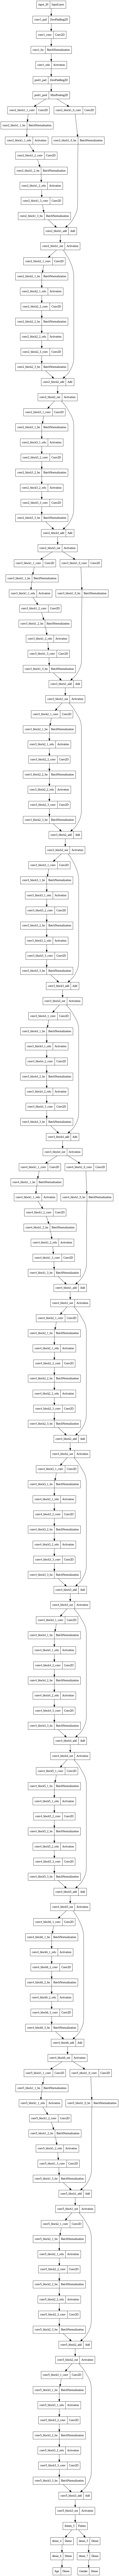

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
#Testing the moodel...
import cv2
test_img=cv2.imread("/content/Photo.jfif")

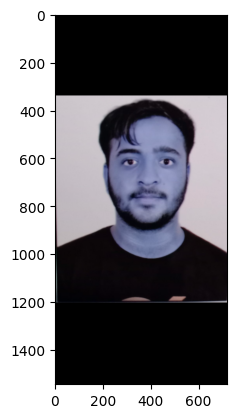

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [ ]:
test_img.shape

(1544, 720, 3)

In [ ]:
test_img=cv2.resize(test_img,(200,200))

In [ ]:
test_input=test_img.reshape(1,200,200,3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 1s/step


[array([[34.848335]], dtype=float32), array([[0.3813958]], dtype=float32)]